# AmazonReviews KNN Assignment

In [1]:
%matplotlib inline

import sqlite3
import pandas as pd #for data frames
import numpy as np #numpy array operations
import nltk #natural lang processing, for processing text
import string
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
import pickle
import seaborn as sn

import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
pickle_in=open("cleanedData.pickle","rb")
final = pickle.load(pickle_in)

In [3]:
pickle_in = open("BOW_tfidf_avgW2V_TfidfW2V.pickle","rb")
count_vect = pickle.load(pickle_in) #BOW
final_counts = pickle.load(pickle_in) #BOW

tf_idf_vect = pickle.load(pickle_in) #TFIDF
final_tf_idf = pickle.load(pickle_in) #TFIDF
features = pickle.load(pickle_in) #TFIDF

w2v_model = pickle.load(pickle_in) #w2v
words = pickle.load(pickle_in) #w2v

sent_vectors = pickle.load(pickle_in) #avg W2V

C:\Users\Dell\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [4]:
# Weighted TF_IDF W2V
pickle_in =open("WiightedTfidfW2V.pickle","rb")
tfidf_sent_vectors = pickle.load(pickle_in)

In [5]:
final.shape

(364171, 11)

In [6]:
final_counts.shape

(364171, 115281)

In [7]:
scores = final['Score'].get_values()
len(scores)

364171

In [8]:
li = lambda x: 1 if x=='positive'  else 0
final_scores = []
for i in range(0,364171):
    final_scores.append(li(scores[i]))

## k-fold Cross Validation Using Time Based Split

In [57]:
from sklearn.model_selection import TimeSeriesSplit

def k_fold_cross_validation(x_1,y_1):
    li = list(range(0,16))
    
    #creating odd list of vals for 'k'
    neighbors = list(filter(lambda x: x%2 != 0,li))

    #empty list to hold CV scores/accuracy
    cv_scores = []

    
    #performing k-fold cross validation with Times Based Split
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k,algorithm='auto',n_jobs=-1)
        tscv = TimeSeriesSplit(n_splits=5)
        acc_sum=0
        cnt=0
        for train_index, test_index in tscv.split(x_1):
            X_train, X_test = x_1[train_index], x_1[test_index]
            Y_train, Y_test = y_1[train_index], y_1[test_index]
            knn.fit(X_train,Y_train)
            pred = knn.predict(X_test)
            acc = accuracy_score(Y_test, pred, normalize=True )*float(100)
            acc_sum=acc_sum+acc
            cnt=cnt+1
        cv_scores.append(acc_sum/cnt)
            
            
   
    # determining best k
    optimal_k = neighbors[cv_scores.index(max(cv_scores))]
    print('\nThe optimal number of neighbors is %d.' % optimal_k)

    # plot misclassification error vs k 
    plt.plot(neighbors, cv_scores)

    for xy in zip(neighbors, np.round(cv_scores,3)):
        plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

    plt.xlabel('Number of Neighbors K')
    plt.ylabel('Accuracy Percentage')
    plt.show()

    print("the Accuracy for each k value is : ", np.round(cv_scores,3))
    print('*********************************************************************')
    print("optimal k value is: ",optimal_k)
    return optimal_k;

# BOW K-Fold CV

In [58]:
final_counts.shape

(364171, 115281)

In [76]:

# Total data frame

x = final_counts[0:10000]


# this is only Score/rating  of data

y = final_scores[0:10000]

In [77]:
#splitting the train and test data

x_1, x_test, y_1, y_test = cross_validation.train_test_split(x,y, test_size=0.3, random_state=0)


In [78]:
#x_1 = np.array(x_1)

y_1 = np.array(y_1)

#x_test = np.array(x_test)

y_test = np.array(y_test)

x_1

<7000x115281 sparse matrix of type '<class 'numpy.int64'>'
	with 365189 stored elements in Compressed Sparse Row format>


The optimal number of neighbors is 7.


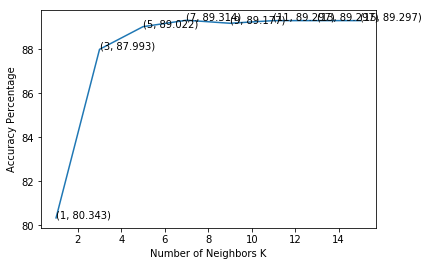

the Accuracy for each k value is :  [80.343 87.993 89.022 89.314 89.177 89.297 89.297 89.297]
*********************************************************************
optimal k value is:  7


In [79]:
optim_k_val = k_fold_cross_validation(x_1,y_1)

In [80]:
knn_optimal = KNeighborsClassifier(n_neighbors=optim_k_val)

# fitting the model
knn_optimal.fit(x_1, y_1)

# predict the response
pred = knn_optimal.predict(x_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optim_k_val, acc))


The accuracy of the knn classifier for k = 7 is 88.233333%


# TF_IDF K-fold CV

In [81]:
final_tf_idf.shape

(364171, 2910192)

In [85]:

# Total data frame
x = final_tf_idf[0:10000]

# this is only Score/rating  of data
y = final_scores[0:10000]


In [86]:
#splitting the train and test data

x_1, x_test, y_1, y_test = cross_validation.train_test_split(x,y, test_size=0.3, random_state=0)

y_1 = np.array(y_1)
y_test = np.array(y_test)



The optimal number of neighbors is 7.


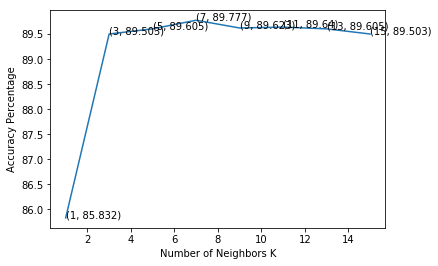

the Accuracy for each k value is :  [85.832 89.503 89.605 89.777 89.623 89.64  89.605 89.503]
*********************************************************************
optimal k value is:  7


In [87]:
opt_val = k_fold_cross_validation(x_1,y_1)

In [88]:
knn_optimal = KNeighborsClassifier(n_neighbors=opt_val)

# fitting the model
knn_optimal.fit(x_1, y_1)

# predict the response
pred = knn_optimal.predict(x_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (opt_val, acc))


The accuracy of the knn classifier for k = 7 is 88.766667%


# W2V K-Fold CV

In [17]:
# Total data frame
x = sent_vectors[0:50000]

# this is only Score/rating  of data
y = final_scores[0:50000]


In [18]:
#splitting the train and test data

x_1, x_test, y_1, y_test = cross_validation.train_test_split(x,y, test_size=0.2, random_state=0)

y_1 = np.array(y_1)
y_test = np.array(y_test)

x_1 = np.array(x_1)
x_test = np.array(x_test)


The optimal number of neighbors is 15.


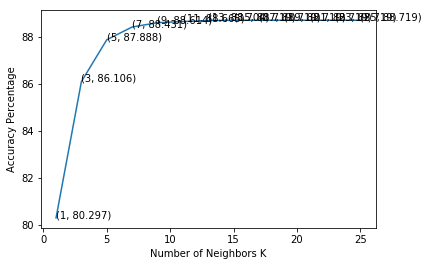

the Accuracy for each k value is :  [80.297 86.106 87.888 88.431 88.614 88.665 88.704 88.719 88.719 88.719
 88.719 88.719 88.719]
*********************************************************************
optimal k value is:  15


In [19]:
opt_val = k_fold_cross_validation(x_1,y_1)

In [20]:
knn_optimal = KNeighborsClassifier(n_neighbors=opt_val)

# fitting the model
knn_optimal.fit(x_1, y_1)

prediction = knn_optimal.predict(x_test)

acc = accuracy_score(y_test, prediction) * 100

print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (opt_val, acc))


The accuracy of the knn classifier for k = 15 is 88.700000%


# Weighted TF-IDF W2V K-Fold CV

In [89]:
len(tfidf_sent_vectors)

1000

In [94]:
x = tfidf_sent_vectors[0:300]

y = final_scores[0:300] 

In [95]:
x_1, x_test, y_1, y_test = cross_validation.train_test_split(x,y, test_size=0.3, random_state = 0)


y_1 = np.array(y_1)
y_test = np.array(y_test)

x_1 = np.array(x_1)
x_test = np.array(x_test)

In [96]:
len(y_test)

90


The optimal number of neighbors is 5.


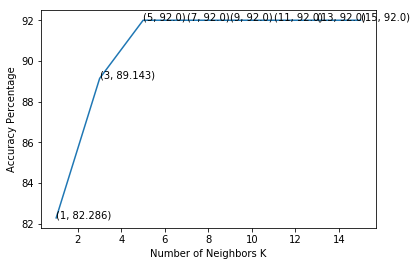

the Accuracy for each k value is :  [82.286 89.143 92.    92.    92.    92.    92.    92.   ]
*********************************************************************
optimal k value is:  5


In [97]:
opt_val = k_fold_cross_validation(x_1,y_1)

In [98]:
knn_optimal = KNeighborsClassifier(n_neighbors=3)

knn_optimal.fit(x_1,y_1)

pred = knn_optimal.predict(x_test)

acc = accuracy_score(y_test,pred) * 100

print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (opt_val, acc))


The accuracy of the knn classifier for k = 5 is 97.777778%


# Summary:<br>
After performing K-Fold Cross Validation here are the results of diff techniques:<br>

1) BOW -> k = 7 acc= 88.23% <br>
2) TF-IDF -> k = 7 acc = 88.7% <br>
3) W2V -> k = 15 acc = 88.7%<br>
4) Weighted TF-IDF W2V -> k = 5 acc = 97.7%(due to memory overflow used less datapoints)